In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import cv2
import random

In [2]:

classes = ['buddha belly', 'cassava', 'coleus', 'insulin','origano']

# Arrays to hold the images and labels
X_train, Z_train = [], []
X_val, Z_val = [], []
X_test, Z_test = [], []

def assign_label(plant_type):
    plant_type = plant_type.lower()  
    if plant_type in classes:
        return classes.index(plant_type)  
    else:
        print(f"Warning: Unrecognized flower type: {plant_type}")
        return None  

# Define dataset path
inputdataset = "/Users/rigensuringa/Desktop/dataset"

# Function to load images from a given folder
def load_images_from_folder(folder_path, X, Z):
    for plant in os.listdir(folder_path):
        plant_path = os.path.join(folder_path, plant)

        if not os.path.isdir(plant_path):  # Skip if it's not a folder
            continue

        label = assign_label(plant)  # Assign label based on folder name
        if label is None:
            print(f"Skipping folder: {plant_path} due to invalid label")
            continue  # Skip this folder if label is invalid

        for filename in os.listdir(plant_path):
            img_path = os.path.join(plant_path, filename)

            # Read the image using OpenCV
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)

            if img is None:
                print(f"Warning: {img_path} could not be loaded.")
                continue

            img = cv2.resize(img, (150,150))

            img = img / 255.0

            X.append(img)
            Z.append(label)

# Load images for training, validation, and test datasets
train_folder = os.path.join(inputdataset, 'Training')
val_folder = os.path.join(inputdataset, 'Validation')
test_folder = os.path.join(inputdataset, 'Testing')

# Load images for each dataset
load_images_from_folder(train_folder, X_train, Z_train)
load_images_from_folder(val_folder, X_val, Z_val)
load_images_from_folder(test_folder, X_test, Z_test)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Z_train = np.array(Z_train)

X_val = np.array(X_val)
Z_val = np.array(Z_val)

X_test = np.array(X_test)
Z_test = np.array(Z_test)

# One-hot encode the labels
Y_train = to_categorical(Z_train, len(classes))
Y_val = to_categorical(Z_val, len(classes))
Y_test = to_categorical(Z_test, len(classes))




Index: 542, Label: 3, Image shape: (150, 150, 3)
Index: 1266, Label: 2, Image shape: (150, 150, 3)
Index: 30, Label: 4, Image shape: (150, 150, 3)
Index: 473, Label: 3, Image shape: (150, 150, 3)
Index: 590, Label: 0, Image shape: (150, 150, 3)
Index: 1213, Label: 2, Image shape: (150, 150, 3)
Index: 810, Label: 0, Image shape: (150, 150, 3)
Index: 1125, Label: 2, Image shape: (150, 150, 3)
Index: 383, Label: 3, Image shape: (150, 150, 3)


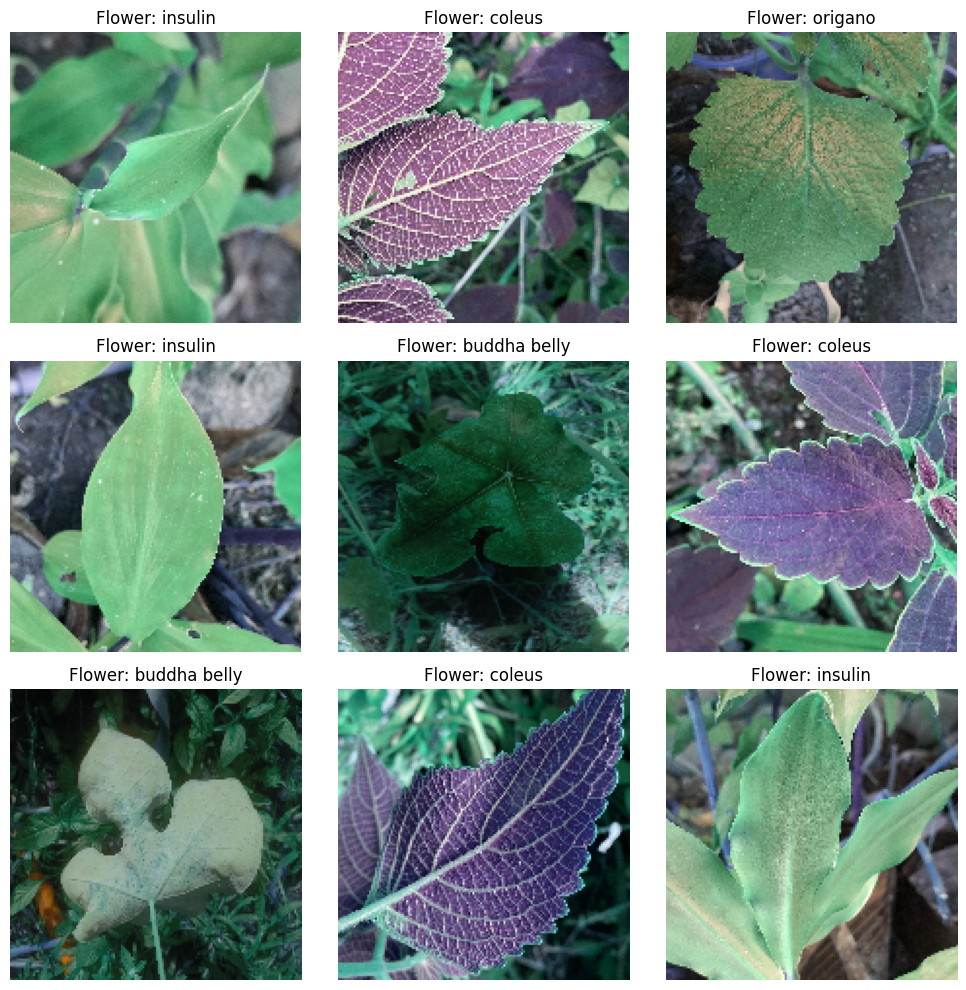

In [3]:
figure, axes = plt.subplots(3, 3)  # Create a 3x3 grid for image display
figure.set_size_inches(10, 10)  # Set the size of the figure

for row in range(3):
    for col in range(3):
        index = random.randint(0, len(X_train) - 1)  # Get a random index
        image = X_train[index]  # Get the image
        plant_label = Z_train[index]  # Get the corresponding label

        # Debugging output
        print(f"Index: {index}, Label: {plant_label}, Image shape: {image.shape}")

        # Plot the image on the grid
        axes[row, col].imshow(image)  # Display image
        axes[row, col].set_title(f"Flower: {classes[plant_label]}")  # Set title with label
        axes[row, col].axis('off')  # Hide axes for cleaner visualization

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5, activation = "softmax"))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             

 Total params: 2,006,597 (7.65 MB)

 Trainable params: 2,005,637 (7.65 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    save_best_only=True,
    monitor='val_loss'
)
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),  
    epochs=40,
    validation_data=(X_val, Y_val), 
    callbacks=[early_stopping,model_checkpoint]
)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 498ms/step - accuracy: 0.4652 - loss: 1.9649 - val_accuracy: 0.2005 - val_loss: 8.2325
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 522ms/step - accuracy: 0.8003 - loss: 0.5542 - val_accuracy: 0.2005 - val_loss: 13.9618
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 547ms/step - accuracy: 0.8057 - loss: 0.6103 - val_accuracy: 0.2080 - val_loss: 9.7847
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 593ms/step - accuracy: 0.8667 - loss: 0.4410 - val_accuracy: 0.2005 - val_loss: 15.5035
Epoch 5/40
23/44 ━━━━━━━━━━━━━━━━━━━━ 12s 612ms/step - accuracy: 0.8663 - loss: 0.4077

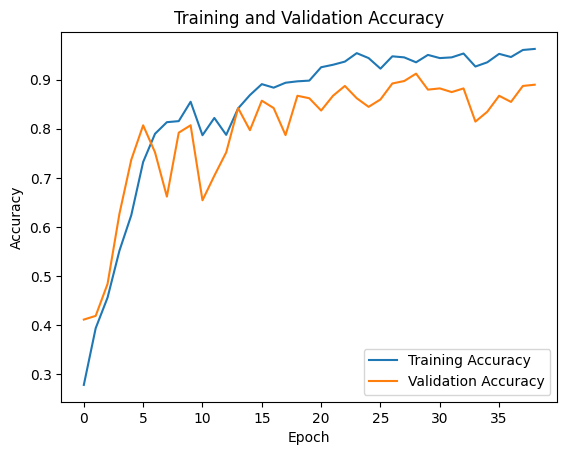

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.show()

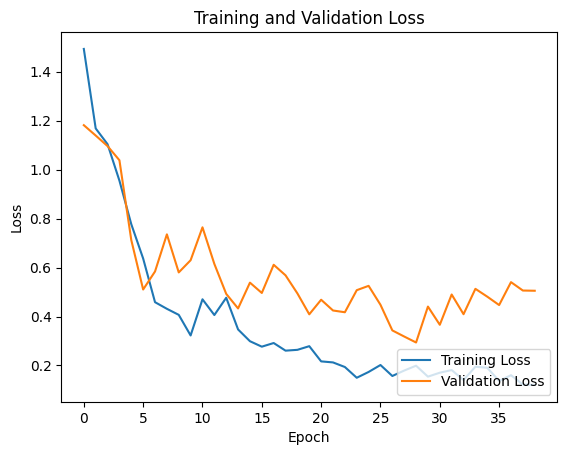

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9107 - loss: 0.2808


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')  
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()
val_loss, val_acc = model.evaluate(X_val, Y_val)

In [ ]:
model = tf.keras.models.load_model('best_model.keras')

test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Final Test Accuracy: {test_acc:.2f}")


ValueError: File not found: filepath=best_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
model.save('final_model.keras')

In [ ]:
image_path = '/Users/rigensuringa/Desktop/r.jpg'

# Load the image with the same size as the model's input size
img = load_img(image_path, target_size=(150, 150))  # Adjust (224, 224) to your model's input size
img_array = img_to_array(img)  # Convert image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize to [0, 1] if your model expects normalized input

print(f"Image shape after preprocessing: {img_array.shape}")
model = tf.keras.models.load_model('final_model.keras')

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class index
confidence = np.max(predictions)  # Get confidence score

# Print the class name and confidence
print(f"Predicted plant type: {classes[predicted_class]}")
print(f"Confidence: {confidence:.2f}")

Image shape after preprocessing: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted plant type: insulin
Confidence: 0.56
